# 计算量子力学

庞龙刚@华中师范大学

## 学习内容

- 本征值、本征向量与本征函数
- 一维定态薛定谔方程的数值解（能谱与波函数）
- 一维波函数的随时演化
- 一维势垒贯穿

- ** 二维定态薛定谔方程的数值解（简并）
- ** 氢原子的波函数与能级
- ** 量子多体问题


In [167]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Arrow
from tqdm import tqdm
import numpy as np

import scipy
import scipy.constants as phy
from scipy import linalg
from ipywidgets import interact

plt.style.use(['science', 'notebook', 'no-latex'])

## 本征值、本征向量与本征函数

寻找一个 nxn 的矩阵 A 的一个本征值 eigenvalue 与本征向量 eigenvector 等价于寻找常数 $\lambda$ 和向量 ${\mathbf v}$ 和，使它们满足如下本征方程，

\begin{align}
A {\mathbf v} = \lambda {\mathbf v}
\end{align}

从几何角度来看，矩阵作用在向量上，会对向量进行一系列的线性变换，比如

- 旋转
- 拉伸
- 升维
- 降维

本征方程表示存在一个向量 ${\mathbf v}$,  矩阵 $A$ 对它进行的线性变换只改变其长度，不改变其方向。

In [168]:
# 举例：2 x 2 旋转矩阵, SO(2) 群的元素, 只改变方向，不改变长度
def rotation_so2(theta = np.pi / 6):
    ct = np.cos(theta)
    st = np.sin(theta)

    A = np.array([[ct, -st],
                  [st, ct]])
    return A

In [169]:
A=rotation_so2()

def rotate_vec(n=1):
    v = np.array([1, 0]).T
    for i in range(n):
        v = A @ v 
    ar1 = plt.Arrow(0, 0, v[0], v[1], width=0.2,
                    color='k', alpha=0.5)

    plt.gca().add_patch(ar1)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal')


interact(rotate_vec, n=(0, 10, 1))

interactive(children=(IntSlider(value=1, description='n', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.rotate_vec(n=1)>

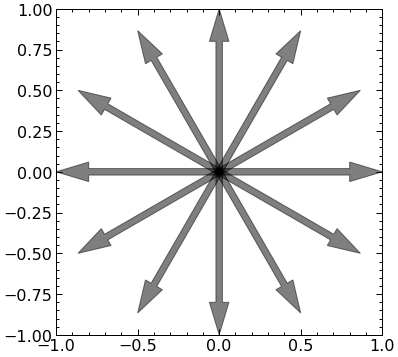

In [170]:
for n in range(12):
    rotate_vec(n)

In [171]:
A = np.array([[1, 4],
              [3, 2]])
# 使用 scipy.linalg 库，计算矩阵 A 的本征值与本征向量
lam, v = linalg.eig(A)

print("eigen values: lam = ", lam)

print("eigen vectors: v = ", v)

# 注意： v[:, 0] = （-0.8， 0.6） 是第 1 个本征向量，
# v[:, 1] = (-0.707, -0.707) 是第 2 个本征向量

eigen values: lam =  [-2.+0.j  5.+0.j]
eigen vectors: v =  [[-0.8        -0.70710678]
 [ 0.6        -0.70710678]]


In [172]:
A @ v

array([[ 1.6       , -3.53553391],
       [-1.2       , -3.53553391]])

In [173]:
lam * v

array([[ 1.6       -0.j, -3.53553391+0.j],
       [-1.2       +0.j, -3.53553391+0.j]])

In [174]:
# linear transformation on eigen vector or ordinary vector
def plot_eig(A, v):
    ar1 = plt.Arrow(0, 0, v[0], v[1], 
                    width=0.2, color='k')
    plt.gca().add_patch(ar1)
    
    Av = A @ v
    ar2 = plt.Arrow(0, 0, Av[0], Av[1], 
              width=0.2, color='r', alpha=0.5)
    plt.gca().add_patch(ar2)
    ranges = np.array([v[0], Av[0], v[1], Av[1]])
    lmax = np.max(np.abs(ranges))
    plt.xlim(-lmax, lmax)
    plt.ylim(-lmax, lmax)
    plt.gca().set_aspect('equal')

Text(0.5, 1.0, 'Eigen value=(-2+0j)')

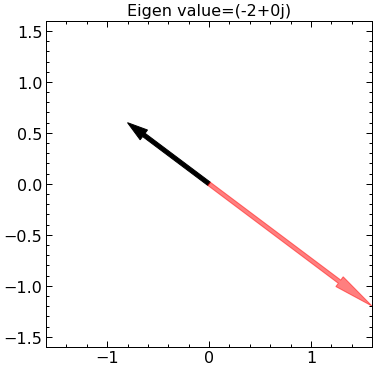

In [175]:
# 对于 第 1 个本征向量 v1, 矩阵 A 作用在 v1 上只提供了常数因子 -2 
v1 = v[:, 0]
plot_eig(A, v1)
plt.title("Eigen value=%s"%lam[0])

Text(0.5, 1.0, 'Eigen value=(5+0j)')

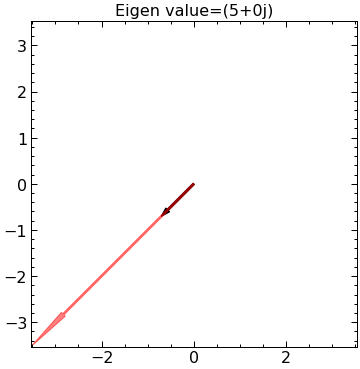

In [176]:
# 对于 第 2 个 本征向量, 矩阵 A 作用在 v2 上只提供了常数因子 5
v1 = v[:, 1]
plot_eig(A, v1)
plt.title("Eigen value=%s"%lam[1])

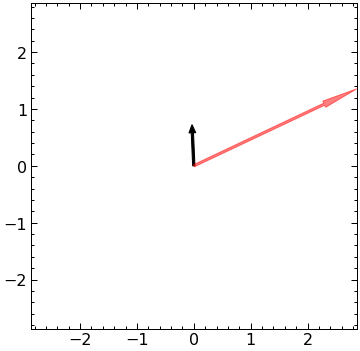

In [177]:
# 对于一个随机向量 vr, 矩阵 A 不仅改变 vr 的长度，也改变 vr 的方向
vrandom = np.random.uniform(-1, 1, 2).T
plot_eig(A, vrandom)

(回顾本科线性代数中的知识) 为了求解本征值问题，可以将方程改写，

\begin{align}
(A - \lambda I) {\mathbf v} = 0
\end{align}

非零解存在的条件是 

\begin{align}
|A - \lambda I|= (\lambda - \lambda_1)(\lambda - \lambda_2) \cdots (\lambda -\lambda_n) = 0
\end{align}
其中 $|\cdot|$ 表示行列式（determinant）。

上述方程的根 $\lambda_i$ 就是矩阵 A 的第 i 个本征值。

将 $\lambda_i$ 代入 $(A - \lambda_i I) {\mathbf v_i} = 0$ 可以解得第 i 个本征向量。

计算物理很少涉及理论求解本征值和本征向量的问题，一般使用数值算法。

之前我们直接使用 scipy.linalg.eig() 函数计算小矩阵 A 的本征值与本征向量。

当矩阵很大时，求解矩阵 A 的本征值与本征向量非常耗时。

在多体量子计算中，涉及 $n = 10^{12}$ 的 $n\times n$ 方阵本征值问题的求解，一般使用 Lanczos 迭代算法。

### 本征函数

如果有一个算子 $\hat{A}$，作用在函数 $\psi(x)$ 上，等于 $\psi(x)$ 乘一个常数 $\lambda$，即

\begin{align}
\hat{A} \psi(x) = \lambda \psi(x)
\end{align}

则称 $\lambda$ 是 $\hat{A}$ 的本征值，$\psi(x)$ 是 $\hat{A}$ 的本征函数。

举例: 微分算子 $\hat{A}={\partial \over \partial x}$ 的本征函数为 $\psi(x) = e^{\lambda x}$，本征值为 $\lambda$, 

\begin{align}
{\partial \over \partial x} \psi(x) = \lambda \psi(x)
\end{align}


举例: 对于二阶微分算子 $\hat{A}={\partial^2 \over \partial x^2}$, 本征函数为 $\psi(x) = c e^{i \lambda x}$，本征值为 $-\lambda^2$, 

\begin{align}
{\partial^2 \over \partial x^2} \psi(x) = - \lambda^2 \psi(x)
\end{align}

很快我们会看到二阶微分算子本征值这个例子在数值求解定态薛定谔方程中的应用。

### 警告：不要轻易交换矩阵、算子和波函数的顺序 (non-abelian)

在线性代数中，切记不要随便交换两个矩阵出现的顺序，因为 $A @ B \neq B @ A$

在量子力学（场论）中，切记不要随便交换两个算子的顺序，因为 $ \partial_x f(x) \neq f(x) \partial_x$

In [178]:
A = np.matrix("1, 2; 3, 4")
B = np.matrix("2, 2; 3, 4")

print("AB =", A @ B)
print("")
print("BA =", B @ A)

AB = [[ 8 10]
 [18 22]]

BA = [[ 8 12]
 [15 22]]


## 薛定谔方程、定态薛定谔方程与本征值问题

薛定谔方程是量子力学的基石，描述了波函数的时间演化。

\begin{align}
i \hbar {\partial \over \partial t} \Psi(x, t) = {\hat H} \Psi(x, t)
\end{align}

其中，${\hat H}$ 是哈密顿算子 (Hamiltonian operator)，它代表了系统的总能量，

\begin{align}
{\hat H}  =  {\hat T} + {\hat V} =  {{\hat p}^2 \over 2m} + V(x, t)
\end{align}

坐标空间中，动量算子 ${\hat p} = -i\hbar {\partial \over \partial x}$, 一维薛定谔方程可以写成，

\begin{align}
i \hbar {\partial \over \partial t} \Psi(x, t) = \left( -{\hbar^2 \over 2m} {{\partial }^2 \over {\partial x}^2} + V(x, t) \right) \Psi(x, t)
\end{align}

假设相互作用势能 $V(x, t)$ 不依赖时间，可写成 $V(x)$, 则哈密顿量也独立于时间，此时波函数对时间和空间可分离，记为，

\begin{align}
\Psi(x, t) = \psi(x) f(t)
\end{align}

代入薛定谔方程得到，

\begin{align}
i \hbar {\partial \over \partial t} \psi(x) f(t) = \left( -{\hbar^2 \over 2m} {{\partial }^2 \over {\partial x}^2} + V(x) \right) \psi(x) f(t)
\end{align}

即，
\begin{align}
i {\hbar \over f(t) } {\partial \over \partial t} f(t) = {1 \over \psi(x)}\left( -{\hbar^2 \over 2m} {{\partial }^2 \over {\partial x}^2} + V(x) \right) \psi(x) = E
\end{align}

将 $f(t)$ 除到第一个式子，$\psi(x)$ 除到第二个式子，得到上面左边的等式。

因为第一个式子只依赖 t，第二个式子仅依赖 x，两者相等，只可能它们都等于一个常数，设为 E。

求解 $f(t)$ 满足的微分方程,

\begin{align}
i {\hbar \over f(t) } {\partial \over \partial t} f(t) = E
\end{align}

得到解 $f(t) \propto e^{-iE t\ / \hbar}$.

空间部分 $\psi(x)$ 满足的方程为，

\begin{align}
\left( -{\hbar^2 \over 2m} {{\partial }^2 \over {\partial x}^2} + V(x) \right) \psi(x) = E \psi(x)
\end{align}

即 ${\hat H} \psi(x) = E \psi(x)$, 根据之前的介绍，这是一个求解哈密顿算子的本征值 $E_n$ 与本征函数 $\psi_n(x)$ 的问题。

每一个不同的 $\psi_n(x)$ 对应一个不同的 $E_n$, 即不同的时间演化函数 $f_n(t) \propto e^{-iE_n t/\hbar}$, 

如果初态是哈密顿算子的本征函数，则其时间演化算符为，

\begin{align}
\Psi_n(x, t) =  e^{-iE_n t} \psi_n(x, 0)
\end{align}

## 数值求解一维定态薛定谔方程

对于任意给定的势能，比如库伦势能（氢原子核与电子相互作用），核子核子相互作用势能，
重味夸克反夸克之间的势能（康奈尔势），或者大量核子的平均场势能（Skyrme，Woods-saxon 势能），
都能得到哈密顿量算子的一系列的本征值与本征函数。

最小本征值对应基态能量，其它本征值对应激发态能量。

最小本征值对应的本征函数为基态波函数。

下面介绍如何数值求解一维的定态薛定谔方程，${\hat H} \psi(x) = E \psi(x)$.

## 波函数的向量表示与算符的矩阵表示

在用 python 画图时，我们一般先将区间离散化，计算出离散坐标上的函数值，然后画折线图。比如对于函数 $f(x) = \sin(x) / x$, 使用如下代码画图，

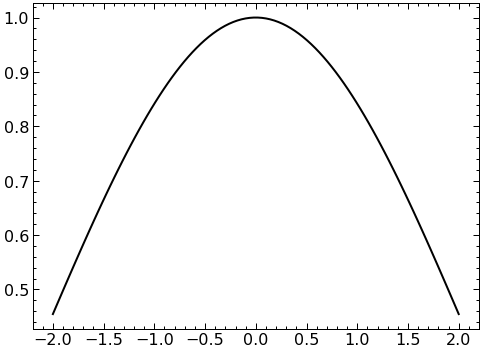

In [179]:
# np.linspace 将区间 [-2, 2] 离散化为 100 个坐标点
x = np.linspace(-2, 2, 100)
# 计算 100 个坐标点上的函数值 f
f = np.sin(x) / x
plt.plot(x, f, 'k')

将波函数表示为离散坐标点上的实数或复数，写为列向量 $|\psi\rangle$ 变得非常容易理解。

回忆微分的有限差分近似，对于一阶微分，
\begin{align}
{df \over dx} \approx  {f(x + h) - f(x - h) \over 2 h} 
\end{align}

对于二阶微分，

\begin{align}
{d^2f \over dx^2} \approx {f(x - h)  - 2 f(x) + f(x + h) \over h^2} 
\end{align}

对区间 [a, b] 所有离散坐标上的 f(x) 微分和二阶微分可以矩阵化，

\begin{align}
{df \over dx} ={1 \over 2h } \begin{bmatrix}  0 & 1 & 0 &  0 & ...& 0 & 0 \\                                               -1 & 0 & 1 &  0 &...& 0 & 0 \\         
0 & -1 & 0 & 1 & ...& 0 & 0 \\ 
0 &  0 & -1 & 0 & ...& 0 & 0 \\
... &  ... & ... & ... & ...& ... & ...\\
0 &  0 & 0 & 0 & ...& 0 & 1 \\ 
0 &  0 & 0 & 0 &  ...& -1 & 0 \\\end{bmatrix}\begin{bmatrix} f(a) \\ f(a+ 1 h) \\ f(a+2h) \\ f(a+3h) \\ ... \\ f(b - 1 h) \\ f(b)\end{bmatrix} = D |f\rangle
\end{align}

\begin{align}
{d^2f \over dx^2} = {1 \over h^2 }\begin{bmatrix}  -2 & 1 & 0 &  0 & ...& 0 & 0 \\                                               1 & -2 & 1 &  0 &...& 0 & 0 \\          0 & 1 & -2 & 1 & ...& 0 & 0 \\ 0 &  0 & 1 & -2 & ...& 0 & 0 \\ ... &  ... & ... & ... & ...& ... & ...\\ 0 &  0 & 0 & 0 & ...& -2 & 1 \\ 0 &  0 & 0 & 0 &  ...& 1 & -2 \\ \end{bmatrix}  \begin{bmatrix} f(a) \\ f(a+1 h) \\ f(a+2h) \\ f(a+3h) \\ ... \\ f(b - 1 h) \\ f(b)  \end{bmatrix} = {\rm L} |f\rangle  
\end{align}

当 f(x) 用列向量 $|f\rangle$ 表示时，就可以用矩阵来表示微分算子。

一阶微分 $df/dx$ 可以用微分算子矩阵 D 点乘 $|f\rangle$ 计算。
二阶微分 $d^2 f/dx^2$ 可以用微分算子矩阵 D 从左边连续作用两次到 $|f\rangle$ 上，也可以使用差分格式直接构造拉普拉斯矩阵，由 $L |f\rangle$ 计算。

对于随便给定的函数 $f(x) = \sin(x)$ , 可以看到上述有限差分矩阵作用在离散的 $|f\rangle$ 上的结果与解析解非常一致。
解定态薛定谔方程 ${\hat H} |\Psi \rangle = E|\Psi \rangle$ 的任务转化为求哈密顿矩阵 $H$ 的本征值 E 和本征向量 $|\Psi\rangle$ 。

### 使用简单例子数值验证微分算子与矩阵的等价性

下面在构造微分算子 D 和 L 的时候要经常用到一个函数，

```python
np.diag(v, k=0),
```

这个函数默认构造一个以向量 v 中的元素为对角元的方阵，非对角元都为 0.

但是当 $k \neq 0$ 时，对角元可以向左上 (k>0) 或右下角移动 (k<0).

接下来验证 $f(x) = \sin x $ 时，$D |f\rangle$, $DD |f\rangle$, $L |f\rangle$ 等与 $\partial_x f$, $\partial_{xx} f$ 的关系。



In [180]:
L = 2 * np.pi
N = 100
x = np.linspace(0, L, N)
dx = x[1] - x[0]

D = np.diag(np.ones((N-1), np.float32), 1) \
  - np.diag(np.ones((N-1), np.float32), -1) 

print(D)

[[ 0.  1.  0. ...  0.  0.  0.]
 [-1.  0.  1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ... -1.  0.  1.]
 [ 0.  0.  0. ...  0. -1.  0.]]


In [181]:
# 设置边界条件 f(0) = 0
D[0, 1] = 0
D[1, 0] = 0

# 设置边界条件 f(L) = 0
D[N-2, N-1] = 0
D[N-1, N-2] = 0

D[0, 0] = 0
D[N-1, N-1] = 0

In [182]:
# 一阶微分的中心差分格式
Dx = D / (2 * dx)

In [183]:
# 二阶微分的差分格式
Lap = (-2 * np.diag(np.ones((N), np.float32), 0)
       + np.diag(np.ones((N-1), np.float32), 1)
       + np.diag(np.ones((N-1), np.float32), -1))/(dx**2)

In [119]:
# 修改边界条件令  f(0) = 0, f(L) = 0
Lap[0, 0] = 0
Lap[0, 1] = 0
Lap[1, 0] = 0

Lap[N-2, N-1] = 0
Lap[N-1, N-2] = 0
Lap[N-1, N-1] = 0

In [245]:
Lap

array([[-496.52444,  248.26222,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [ 248.26222, -496.52444,  248.26222, ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,  248.26222, -496.52444, ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [   0.     ,    0.     ,    0.     , ..., -496.52444,  248.26222,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,  248.26222, -496.52444,
         248.26222],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,  248.26222,
        -496.52444]], dtype=float32)

In [120]:
f = np.sin(x)

In [121]:
Df = np.dot(Dx, f)
DDf = np.dot(Dx, Df)
Lapf = np.dot(Lap, f)

In [124]:
def check_deriv():
    #with plt.style.context(['science', 'ieee']):
    with plt.style.context(['science', 'notebook', 'no-latex']):
        plt.plot(x, Df, 'o', label=r'$D \cdot f$')
        plt.plot(x, DDf, 's', label=r'$D \cdot D \cdot f$')
        plt.plot(x, Lapf, '*', label=r'$L \cdot f$')
        plt.plot(x, np.cos(x), '-', label=r"$\cos x$")
        plt.plot(x, -np.sin(x), '--', label=r'$-\sin x$')
        plt.ylim(-1.2, 1.8)
        plt.xlabel(r'$x$')
        plt.title(r'$f(x) = \sin(x)$')
        plt.legend(loc=(0.25, 0.5))
        plt.savefig("../htmls/images/D_Lap.png")

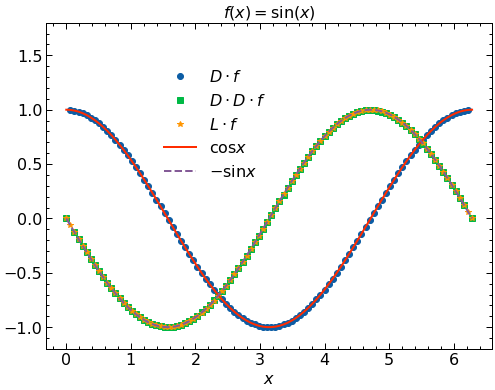

In [125]:
check_deriv()

## 数值求解一维薛定谔方程

先将一维定态薛定谔方程的数值解封装成一个类，

后面可以研究对各种不同的相互作用势能，求解结果

In [135]:
class Schrodinger:
    '''Solve 1D stationary schrodinger equation numerically for any
    given potential that allows bound states '''
    def __init__(self, potential_func, 
                 mass = 1, hbar=1,
                 xmin=-5, xmax=5, ninterval=1000):
        # 将坐标离散化
        self.x = np.linspace(xmin, xmax, ninterval)    
        self.U = np.diag(potential_func(self.x), 0)        
        self.Lap = self.laplacian(ninterval)        
        self.H = - hbar**2 / (2*mass) * self.Lap + self.U       
        self.eigE, self.eigV = self.eig_solve()
            
        
    def laplacian(self, N):
        '''构造二阶微分算子：Laplacian'''
        dx = self.x[1] - self.x[0]
        return (-2 * np.diag(np.ones((N), np.float32), 0)
            + np.diag(np.ones((N-1), np.float32), 1)
            + np.diag(np.ones((N-1), np.float32), -1))/(dx**2)
    
    def eig_solve(self):
        w, v = np.linalg.eig(self.H)  
        idx_sorted = np.argsort(w)     
        return w[idx_sorted], v[:, idx_sorted]
    
    def wave_func(self, n=0):
        return self.eigV[:, n]
    
    def eigen_value(self, n=0):
        return self.eigE[n]
    
    def check_eigen(self, n=7):
        '''compare H|psi_n> with E_n |psi_n>'''
        HPsi = np.dot(self.H, self.eigV[:, n])
        EPsi = self.eigE[n] * self.eigV[:, n]
        plt.plot(self.x, HPsi, label=r'$H|\psi_{%s} \rangle$'%n)
        plt.plot(self.x, EPsi, '-.', label=r'$E |\psi_{%s} \rangle$'%n)
        plt.legend(loc='upper center')
        plt.xlabel(r'$x$')
        plt.ylim(EPsi.min(), EPsi.max() * 1.6)
            
    def plot_density(self, n=7):
        rho = self.eigV[:, n] * self.eigV[:, n]
        leg = r'$E_{%s}=%.2f$'%(n, self.eigE[n])
        plt.plot(self.x, rho, label=leg)
        plt.ylabel(r'$\rho_{%s}(x)=\psi_{%s}^*(x)\psi_{%s}(x)$'%(n, n, n))
        plt.xlabel(r'$x$')
        plt.legend(loc='best')
            
    def plot_potential(self):
        plt.plot(self.x, np.diag(self.U))
        plt.ylabel(r'potential')
        plt.xlabel(r'$x$')
            
    def plot_energy_levels(self, levels=10):
        for n in range(levels):
            plt.plot(self.x, np.ones_like(self.x) * self.eigE[n], 'r-')
        plt.ylabel(r'energy levels')
        plt.xlabel(r'$x$')


### 1. 谐振子势 $V(x) = \frac{1}{2} k x^2$ 取 $k=100$. 

此时解析解 $E_n = \hbar \omega (n + {1\over 2})$, 其中 n 为整数，$\omega = \sqrt{k/m} = 10$ 弧度每秒。

In [136]:
def harmonic_potential(x, k=100):
    return 0.5 * k * x**2

In [137]:
schro_harmonic = Schrodinger(harmonic_potential)

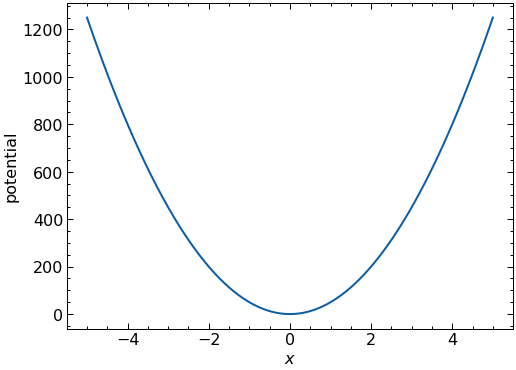

In [138]:
schro_harmonic.plot_potential()

<IPython.core.display.Javascript object>


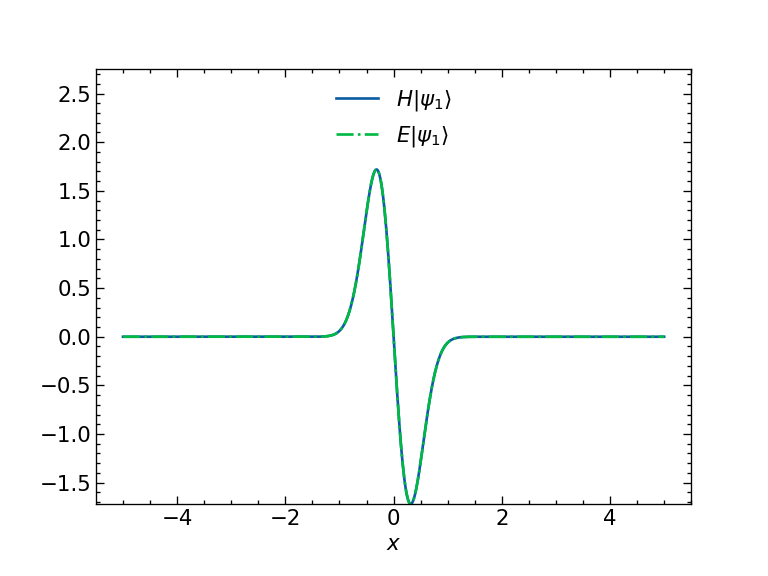

In [246]:
# 这条命令检查薛定谔方程的解是否准确，具体来说就是本征方程是否满足
# H Psi_n = E_n Psi_n 

schro_harmonic.check_eigen(n=1)

In [184]:
interact(schro_harmonic.check_eigen, n=(0, 20, 1))

interactive(children=(IntSlider(value=7, description='n', max=20), Output()), _dom_classes=('widget-interact',…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

<IPython.core.display.Javascript object>


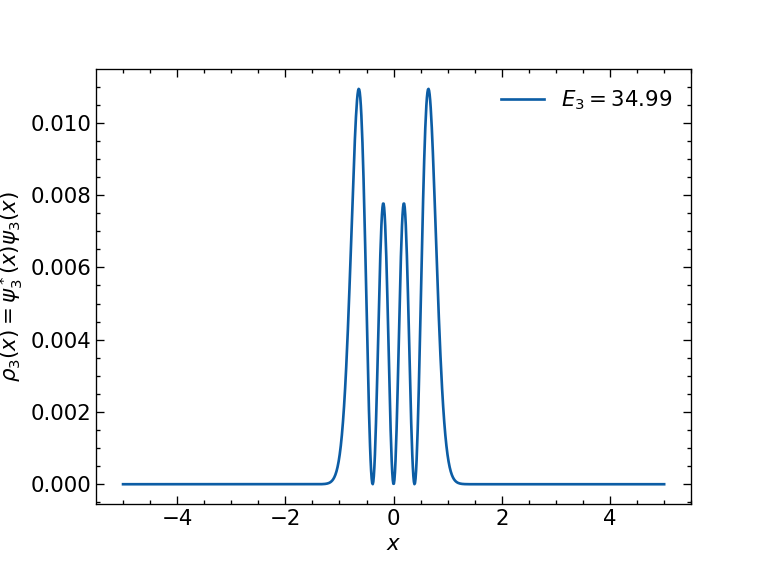

In [247]:
schro_harmonic.plot_density(n=3)

In [144]:
interact(schro_harmonic.plot_density, n=(0, 20, 1))

interactive(children=(IntSlider(value=7, description='n', max=20), Output()), _dom_classes=('widget-interact',…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

从教科书上找到谐振子势能下波函数的解析形式为，

\begin{align}
\psi_{n}(x)=\frac{1}{\sqrt{2^{n} n !}}\left(\frac{m \omega}{\pi \hbar}\right)^{1 / 4} e^{-m \omega x^{2} / 2 \hbar} H_{n}\left(\sqrt{\frac{m \omega}{\hbar}} x\right)
\end{align}

本征能量为 
\begin{align}
E_n = \hbar \omega (n + {1 \over 2})
\end{align}

这里$\omega = 10 \ rad/s$, 设 $\hbar = 1$.

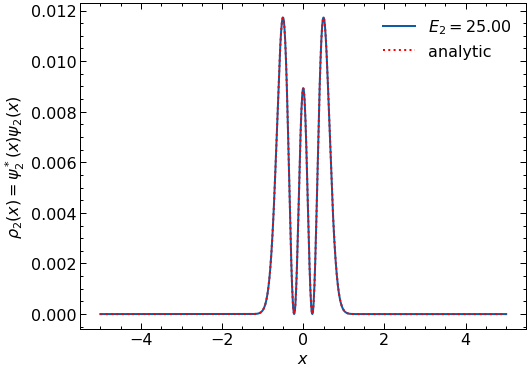

In [211]:
from scipy.special import hermite
from math import factorial

def harmo_psi(x, n=0, m=1, omega=10, hbar=1):
    '''谐振子势下波函数的解析解'''
    coef = 1 / np.sqrt(2**n * factorial(n))
    coef = coef * (m * omega / hbar / np.pi)**0.25
    Hn = hermite(n)
    wf = coef * np.exp(-m*omega*x**2 / (2*hbar)) * Hn(np.sqrt(m*omega/hbar)*x)
    return wf

x = np.linspace(-5, 5, 1000)
dx = x[1] - x[0]
psi2 = harmo_psi(x, n=2)
E2 = 25
rho2 = psi2 * psi2 * dx

schro_harmonic.plot_density(n=2)
plt.plot(x, rho2, 'r:', label='analytic')
plt.legend(loc='best')

上述数值解的能级 $ E_0=5,\ E_1=15, \ E_2=25, \ E_3 = 34.99 \dots$ 与解析解非常相近，

对比解析解

\begin{align}
E_n = \hbar \omega(n + {1 \over 2})
\end{align}

其中 $\omega = \sqrt{k/m} =  \sqrt{100/1}  = 10\ rad/s, \hbar = 1$,

解析解中，n=0 时， $E_0=5$ 。 n = 1, 2, 3... 时， $E_n$ 是 $E_0$ 的 3 倍，5倍，7倍... 。


## 测试 woods_saxon 势能

在核物理领域，原子核中一大团核子所产生的平均场势能接近于 Woods Saxon 函数形式。这里看看Woods Saxon 势阱中一个核子的能级分布。势阱函数形式为，

In [145]:
def woods_saxon_potential(x, R0=6.2, surface_thickness=0.5):
    sigma = surface_thickness
    return  -1 / (1 + np.exp((np.abs(x) - R0)/sigma))

In [146]:
ws_schro = Schrodinger(woods_saxon_potential)

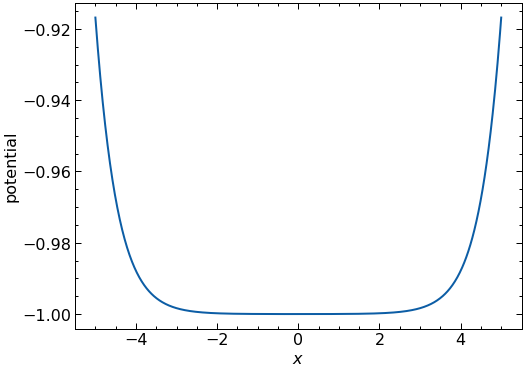

In [147]:
ws_schro.plot_potential()

In [149]:
interact(ws_schro.plot_density, n=(0, 20, 1))

interactive(children=(IntSlider(value=7, description='n', max=20), Output()), _dom_classes=('widget-interact',…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

## 双势阱

In [150]:
def double_well(x, xmax=5, N=100):
    w = xmax / N
    a = 3 * w
    return -100 * (np.heaviside(x + w - a, 0.5) - np.heaviside(x - w - a, 0.5)
                  +np.heaviside(x + w + a, 0.5) - np.heaviside(x - w + a, 0.5))

In [151]:
dw = lambda x: double_well(x, xmax=5, N=1000)
dw_shro = Schrodinger(double_well)

(-0.6, 0.6)

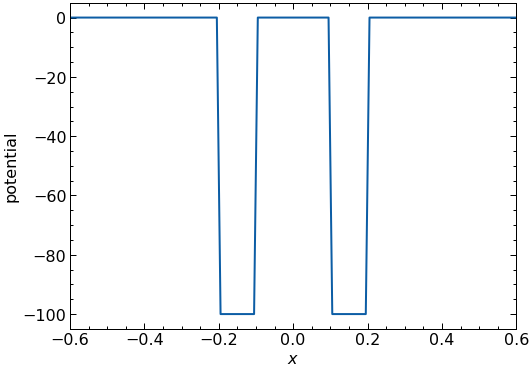

In [152]:
dw_shro.plot_potential()
plt.xlim(-0.6, 0.6)

(-5, 5)

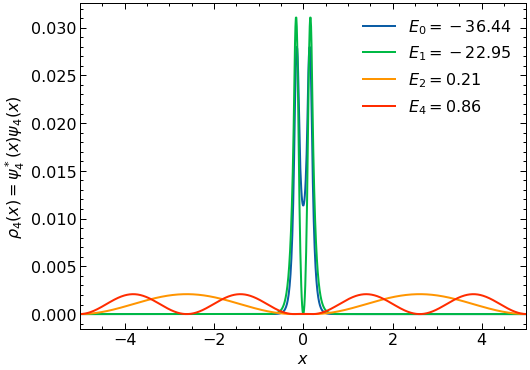

In [153]:
dw_shro.plot_density(n=0)
dw_shro.plot_density(n=1)
dw_shro.plot_density(n=2)
dw_shro.plot_density(n=4)
plt.xlim(-5, 5)

注意：

在求解束缚态的本征值问题时，我们使用了边界条件 $\Psi(x= x_{\rm min})=0$ 和  $\Psi(x= x_{\rm max})=0$，

这个条件只对束缚态有效，即本征能量小于势垒的最大值。

对于本征能量高于势垒的激发态，上面边界条件不再满足，激发态的能量和波函数的计算都会有比较大的误差。

## 时间依赖的薛定谔方程

使用double well 的基态 $|\Psi_{E_0}\rangle$ 和 第一激发态 $|\Psi_{E_1}\rangle$ 构造叠加态，


$|\Psi(t=0)\rangle = (|\Psi_{E_0}\rangle + |\Psi_{E_1}\rangle) / \sqrt{2}$

波函数的时间依赖直接应用时间演化算符，

$|\Psi(t)\rangle = (|\Psi_{E_0}\rangle \exp(-i E_0 t / \hbar) + |\Psi_{E_1}\rangle \exp(-i E_1 t / \hbar)) / \sqrt{2}$

(-2, 2)

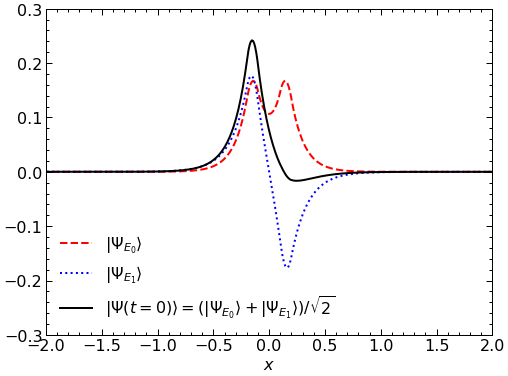

In [157]:
psi0 = dw_shro.wave_func(n=0)
psi1 = dw_shro.wave_func(n=1)
psi = 1 / np.sqrt(2) * (psi0 + psi1)

plt.plot(dw_shro.x, psi0, 'r--', label=r'$|\Psi_{E_0} \rangle$')
plt.plot(dw_shro.x, psi1, 'b:', label=r'$|\Psi_{E_1} \rangle$')
plt.plot(dw_shro.x, psi, 'k-', label=r'$|\Psi(t=0)\rangle = (|\Psi_{E_0}\rangle + |\Psi_{E_1}\rangle) / \sqrt{2}$')
plt.legend(loc='best')
plt.xlabel(r'$x$')
plt.ylim(-0.3, 0.3)
plt.xlim(-2, 2)
# 初始时刻基态与第一激发态在右边势阱处相消，
# 导致叠加态的波函数在左边势阱处有峰值结构。后面演示此峰如何随时间在两个势阱间振荡

In [158]:
def psit(t, hbar=1):
    '''基态与第一激发态的叠加态波函数，随时演化'''
    psi0 = dw_shro.wave_func(n=0)
    psi1 = dw_shro.wave_func(n=1)
    E0 = dw_shro.eigen_value(0)
    E1 = dw_shro.eigen_value(1)
    return 1/np.sqrt(2) * (psi0 * np.exp(-1j * E0 * t/hbar)
                        +  psi1 * np.exp(-1j * E1 * t/hbar))

In [159]:
# 可以检查叠加态的幺正性
psi_o = psit(t=0)
np.dot(np.conjugate(psi_o.T), psi_o) 

#Output: (1.0000000000002667+0j)

(1.000000000000242+0j)

In [160]:
psi_t1 = psit(t=1)
np.dot(np.conjugate(psi_t1.T), psi_t1) 

#Output (1.0000000000001603+0j)

(1.000000000000145+0j)

In [161]:
from matplotlib.animation import FuncAnimation
class UpdateDist:
    def __init__(self, ax, x):
        self.success = 0
        self.line, = ax.plot([], [], 'k-')
        
        self.x = x
        self.ax = ax
        # Set up plot parameters
        self.ax.set_xlim(-0.6, 0.6)
        self.ax.set_ylim(-0.02, 0.1)
        self.ax.grid(True)

    def __call__(self, i):
        time = i * 0.01
        psi = psit(t = time)
        density = np.real(np.conjugate(psi) * psi)    
        self.line.set_data(self.x, density)
        return self.line,

<IPython.core.display.Javascript object>


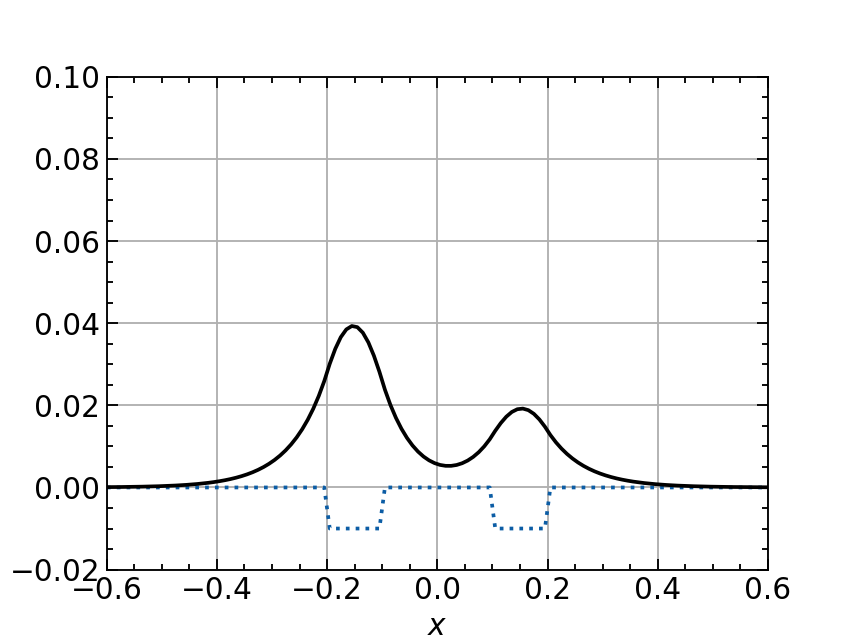

In [165]:
%matplotlib notebook
potential = double_well(dw_shro.x) * 1.0E-4
fig, ax = plt.subplots()
ax.plot(dw_shro.x, potential, ':')
ax.set_xlabel(r'$x$')
ud = UpdateDist(ax, x=dw_shro.x)
anim = FuncAnimation(fig, ud, frames=1000, interval=10, blit=True)
#anim.save('images/double_well_evolution.mp4')
#plt.show()

## 势垒贯穿

1. 先构造一个高斯波包
2. 让高斯波包向右移动，穿过任一给定势垒
3. 计算投射与反射几率

In [253]:
%matplotlib inline
class QuantumTunnel:
    def __init__(self, potential_wall,
                 mass = 1, hbar=1,
                 xmin=0, xmax=100, ninterval=1600):
        # 将坐标离散化
        self.x = np.linspace(xmin, xmax, ninterval) 
        
        self.hbar = hbar
        self.mass = mass
        
        self.U = np.diag(potential_wall(self.x), 0)
        
        self.wave, self.avgE = self.wave_packet(self.x)
        
        self.Lap = self.laplacian(ninterval)        
        self.H = - hbar**2 / (2*mass) * self.Lap + self.U       
        #self.eigE, self.eigV = self.eig_solve()
        self.history = {}
        
    def laplacian(self, N):
        '''构造二阶微分算子：Laplacian'''
        dx = self.x[1] - self.x[0]
        return (-2 * np.diag(np.ones((N), np.float32), 0)
            + np.diag(np.ones((N-1), np.float32), 1)
            + np.diag(np.ones((N-1), np.float32), -1))/(dx**2)
        
    def plane_wave(self, x, k=0):
        return np.exp(1j * k * x)
    
    def rho(self, psi):
        '''从归一化的波函数计算概率密度'''
        return (np.conjugate(psi) * psi).real
    
    def evolve(self, tfinal=30.0, nt=400):
        t = np.linspace(0, tfinal, nt)
        dt = t[1] - t[0]
        Ut = linalg.expm(-1j * self.H * dt / self.hbar)
        #print('Ut=', Ut)
        psi_list = []
        rho_list = []
        
        psi = np.copy(self.wave)
        psi_list.append(psi)
        rho_list.append(self.rho(psi))
        
        for i in range(nt):
            psi = np.dot(Ut, psi)
            psi_list.append(psi)
            rho_list.append(self.rho(psi))
            
        return t, self.x, psi_list, rho_list
    
    
    def reflect_probability(self, rho_):
        N = len(self.x)
        dx = self.x[1] - self.x[0]
        return np.sum(rho_[:N//2]) * dx 
                
    
    def wave_packet(self, x, kmu=2, ka=20):
        '''kmu: peak momentum
           ka: momentum width parameter
           return the Fourier transformation of 
                  exp(-ka * (k - kmu)^2) * exp(-6j k^2)
        '''
        L = x[-1] - x[0]
        dk = 2 * np.pi / L
        N = len(x)
        k = np.linspace(0, N*dk, N)
        # 动量空间下的高斯波包
        psi_k = np.exp(-ka*(k - kmu)**2) * np.exp(-6j * k**2)
        # 动能期望值
        temp = np.dot(np.diag(k*k, 0)/(2*self.mass), psi_k)
        avgE = np.dot(np.conjugate(psi_k), temp) * dk
        avgE = avgE / self.norm(psi_k, dk)**2
        print('<E>', avgE)
        # 傅里叶变换到坐标空间
        psi = np.fft.ifft(psi_k)
        dx = self.x[1] - self.x[0]
        psi = psi / self.norm(psi, dx)
        return psi, avgE
    
    def norm(self, psi, mesh_size):
        # 归一离散化的波函数
        norm = np.sqrt(np.dot(np.conjugate(psi), psi) * mesh_size)
        return norm   
    
    def plot_wave_packet(self, show_density=True):
        plt.plot(self.x, self.wave.real, label=r'$\psi(x)$')
        if show_density: 
            density = (np.conjugate(self.wave) * self.wave).real
            plt.plot(self.x, density, label='$\psi^*(x)\psi(x)$')
        plt.xlabel(r'$x$')
        plt.legend(loc='best', title="wave packet")
            
    def plot_potential(self):
        plt.plot(self.x, np.diag(self.U))
        plt.ylabel(r'potential')
        plt.xlabel(r'$x$')

In [254]:
# np.heaviside 函数定义几个常见的势垒。heaviside(x, 0.5) 有两个参数，
# 第一个参数 x 是一个数组，函数对 x < 0 区域返回 0，x>0 的区域返回 1，x==0 返回 0.5。
def barrier(x, avgE=2.06, shape="square"):
    '''shape: {square, heavyside, well}'''
    L = x[-1] - x[0]
    if shape == 'square':
        pot = (np.heaviside(x - 0.45 * L, 0.5)-np.heaviside(x - 0.55 * L, 0.5)) * avgE
    elif shape == 'heavyside':
        pot = np.heaviside(x - 0.5 * L, 0.5) * avgE
    elif shape == 'well':
        pot = (np.heaviside(x - 0.55 * L, 0.5)-np.heaviside(x - 0.45 * L, 0.5)) * avgE
    return pot

<E> (2.00625+0j)


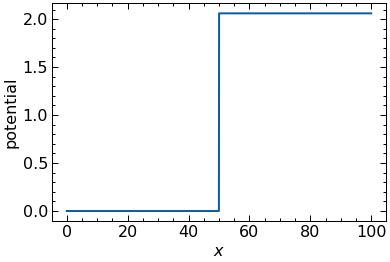

In [257]:
pot = lambda x: barrier(x, shape='heavyside')

qt = QuantumTunnel(potential_wall = pot)

qt.plot_potential()

<E> (2.00625+0j)


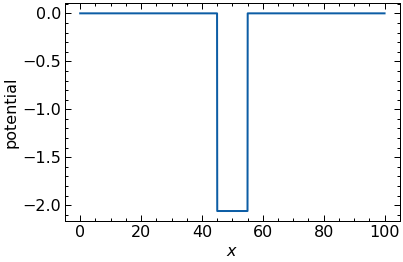

In [256]:
pot = lambda x: barrier(x, shape='well')

qt = QuantumTunnel(potential_wall = pot)

qt.plot_potential()

<E> (2.00625+0j)


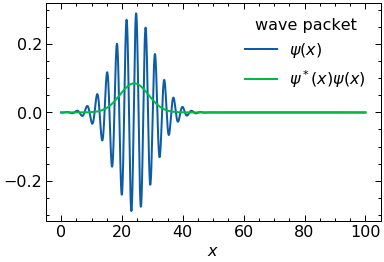

In [258]:
pot = lambda x: barrier(x, shape='square')

qt = QuantumTunnel(potential_wall = pot)

qt.plot_wave_packet()

In [233]:
t, x, psi_list, rho_list = qt.evolve()

### 如何做时间演化呢？

我们的例子代码是，
```python
linalg.expm(-1j * self.H * dt / self.hbar)
```
使用了最简单的时间演化算符，

\begin{align}
\hat{U} \equiv e^{- i H \Delta t / \hbar}
\end{align}

将此算符作用在波函数上，得到下一时刻的波函数，

\begin{align}
|\Psi(x, t+\Delta t) \rangle = {\hat U} |\Psi(x, t) \rangle
\end{align}

如果 $H$ 是非对角的，只有将其对角化，才能计算 $e^{i H t/\hbar}$。

如果 $|\Psi_n \rangle$ 是一个本征态，则时间演化可以直接写成，$e^{-iE_n t} |\Psi_n\rangle$.

如果不想将 H 对角化计算 $e^{- i H \Delta t / \hbar}$, 可以使用一些近似算法。

（1）第一种是简单的向前欧拉法 （Euler Method）
\begin{align}
\Psi(t+\Delta t) = \left( 1 - {i \hat{H} \Delta t \over \hbar} + O(\Delta t^2)\right) \Psi(t)
\end{align}

但这种方法的问题是不保概率 (not unitary)！

一个时间步，波函数的增大因子为， 

\begin{align}
\left( 1 - {i \hat{H} \Delta t \over \hbar} \right)^{+} \left( 1 - {i \hat{H} \Delta t \over \hbar}\right) = 1 + \left(\hat{H} \Delta t \over \hbar\right)^2  \neq 1
\end{align}

回忆哈密顿系统的辛几何算法章节，经典哈密顿系统数值算法不保辛会发散。

计算量子力学中，时间演化不幺正（保概率），也会发散。

此处不再示例，大家可以自己下去尝试。

(2) 第二种是向后欧拉法 （Backward Euler），即后向差分近似的展开

\begin{align}
\Psi(t - \Delta t) = \left( 1 + {i \hat{H} \Delta t \over \hbar} + \mathcal{O}(\Delta t^2)\right) \Psi(t)
\end{align}

可以得到，

\begin{align}
\Psi(t + \Delta t) = \left( 1 + {i \hat{H} \Delta t \over \hbar}\right)^{-1}\Psi(t) + \mathcal{O}(\Delta t^2) 
\end{align}

但这种算法同样不保概率（not unitary)。


(3) 第三种是 Crank-Nicolson 算法，是前向与后向算法的组合，

思路是对前 ${\Delta t \over 2}$ 使用前向欧拉法，后半 ${\Delta t \over 2}$使用后向欧拉法，

\begin{align}
&t_{0}+\Delta t / 2: &\quad \psi(\mathbf{x}, t+\Delta t / 2)&=\left(1-\frac{i \Delta t}{2 \hbar} \hat{H}\right) \psi(\mathbf{x}, t) \\
&t_{0}+\Delta t: &\psi(\mathbf{x}, t+\Delta t)&=\left(1 + \frac{i \Delta t}{2 \hbar} \hat{H} \right)^{-1} \psi(\mathbf{x}, t+\Delta t / 2)
\end{align}

综合起来，得到 Crank-Nicolson 时间演化算法，
\begin{align}
\psi(\mathbf{x}, t+\Delta t)=\frac{2-i \hat{H} \Delta t / \hbar}{2+i \hat{H} \Delta t / \hbar} \psi(\mathbf{x}, t)
\end{align}

Crank-NIcolson 时间演化算法是幺正(unitary) 保概率，且无条件稳定的算法，

\begin{align}
\psi(\mathbf{x}, t+\Delta t)=\frac{2-i \hat{H} \Delta t / \hbar}{2+i \hat{H} \Delta t / \hbar} \psi(\mathbf{x}, t)
\end{align}

但 Crank-Nicolson 算法要求大矩阵的逆，比较耗时。

<IPython.core.display.Javascript object>


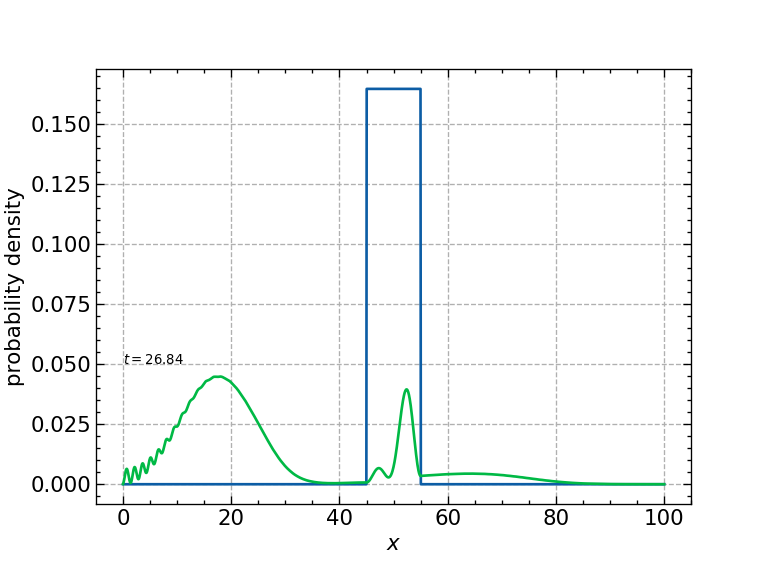

In [244]:
%matplotlib notebook

potential = pot(qt.x)
fig1, ax1 = plt.subplots()
plt.plot(qt.x, potential * 0.08)
line, = plt.plot(qt.x, rho_list[0])
text = plt.text(0, 0.05, '')
plt.grid(ls="--")
plt.ylabel('probability density')
plt.xlabel(r'$x$')

def update(i):
    line.set_data(qt.x, rho_list[i])
    text.set_text(r'$t=%.2f$'%t[i])
    return line, text,
    
anim1 = FuncAnimation(fig1, update, frames=1000, interval=10, blit=True)
#anim1.save('images/quantum_tuneling_well.mp4')   

# 透射与反射概率

上面量子隧道贯穿代码中有计算透射与反射概率的代码。

练习： 可以在演化后期，根据波函数在势垒左边还是右边，来计算粒子穿透势垒的概率密度和被反射的概率密度。

# 作业：从康奈尔势计算 $c\bar{c}$ 的质量谱

使用上一次作业中重味夸克反夸克相互作用势能 -- 康奈尔势能，解定态薛定谔方程，

得到粲夸克反夸克束缚态 $c\bar{c}$ 的最低能量及几个激发态能级与波函数。

1. 仿照之前的谐振子势能、woods-saxon 势能，自己定义 cornell_potential, 注意人工截断 r=0， 防止发散
2. 调用 ccbar = Schrodinger(cornell_potential, xmin=0.001, xmax=2, mass=0.66, hbar=0.19732, ninterval=2000)
3. 画出康奈尔势能 ccbar.plot_potential()
4. 画出 ccbar 系统能级，ccbar.plot_energy_levels(levels=3)
5. 使用 jpsi.plot_density(n=0) 画出基态概率函数，改变 n 得到几个激发态波函数

注意：这次作业只是定性计算，有个直观的理解，不要求在球坐标下求解，也不要求跟实验测量的数据，比如$J/\Psi$质量，还有几个激发态粒子质量做对比。

有余力者，可以尝试构造球坐标下沿径向的哈密顿矩阵，迳向薛定谔方程为，

\begin{align}
-\frac{\hbar^{2}}{2 \mu} \frac{1}{r^{2}} \frac{d}{d r}\left(r^{2} \frac{d}{d r} R_{n \ell}(r)\right)+V_{e f f}(r) R_{n \ell}(r)=E_{n} R_{n \ell}(r)
\end{align}

其中 

\begin{align}
V_{e f f}(r)=V(r)+\frac{\hbar^{2} \ell(\ell+1)}{2\mu r^{2}}
\end{align}

依赖于轨道角动量量子数 $\ell$。$\mu$ 是 $c\bar{c}$ 的约化质量。

可以选择几个不同的 $\ell=(0, 1, 2)$, 并补全哈密顿矩阵中缺少的一阶微分项（径向独有）。